In [1]:
import os
import glob
os.getcwd()

'/home/xchen/Projects/XMutant/DeepJanus-MNIST/data_analysis'

In [2]:
run_path = os.path.join("..", "runs_server", "runs_400_equal_weight")
assert os.path.exists(run_path), f"run_oath path {run_path} does not exist"

In [3]:
import pandas as pd
import json

def convert_timestamp_to_seconds(timestamp):
    """covert '0:00:54.982889' to seconds"""
    return pd.to_timedelta(timestamp).total_seconds()

file_name = glob.glob(os.path.join(run_path, f"MNIST_02-*"))
print(f"Found {len(file_name)} folders")
df_all = None

for file in file_name:
    print(file)

    config_json = os.path.join(file, "config.json")
    with open(config_json, "r") as f:
        config = json.load(f)
        # print(config)
    df_csv = pd.read_csv(os.path.join(file, "stats.csv"), header=0, names=["run",  "iteration",  "timestamp", "archive_len", "sparseness"],usecols=range(5))# , header=None

    df_csv["timestamp_seconds"] = df_csv["timestamp"].apply(convert_timestamp_to_seconds)
    df_csv.drop(columns=["run", "timestamp"], inplace=True)

    df_csv["xmutant_config"] = f"{config['xmutant_xai']}_{config['xmutant_selection']}_{config['xmutant_direction']}"
    df_csv["archive_threshold"] = config["archive tshd"]

    if df_all is None:
        df_all = df_csv
    else:
        df_all = pd.concat([df_all, df_csv], ignore_index=True)

#         df_summary = df_summary.merge(df_csv, on=["iteration",'xmutant_config', "archive_threshold"] , suffixes=("", "_new"))
#         # update
#         df_summary["archive_len"] += df_summary["archive_len_new"]
#         df_summary["timestamp_seconds"] += df_summary["timestamp_seconds_new"]
#         df_summary.drop(columns=["archive_len_new", "timestamp_seconds_new"], inplace=True)
# #

Found 60 folders
../runs_server/runs_400_equal_weight/MNIST_02-21_10-43_label_3_gen_400_AT_4.0_SmoothGrad
../runs_server/runs_400_equal_weight/MNIST_02-21_11-48_label_9_gen_400_AT_1.0_None
../runs_server/runs_400_equal_weight/MNIST_02-21_10-54_label_4_gen_400_AT_4.0_SmoothGrad
../runs_server/runs_400_equal_weight/MNIST_02-21_10-47_label_3_gen_400_AT_4.0_SmoothGrad
../runs_server/runs_400_equal_weight/MNIST_02-21_11-35_label_8_gen_400_AT_1.0_SmoothGrad
../runs_server/runs_400_equal_weight/MNIST_02-21_11-29_label_7_gen_400_AT_1.0_None
../runs_server/runs_400_equal_weight/MNIST_02-21_10-36_label_2_gen_400_AT_4.0_SmoothGrad
../runs_server/runs_400_equal_weight/MNIST_02-21_11-19_label_6_gen_400_AT_1.0_None
../runs_server/runs_400_equal_weight/MNIST_02-21_10-28_label_1_gen_400_AT_1.0_None
../runs_server/runs_400_equal_weight/MNIST_02-21_11-23_label_7_gen_400_AT_4.0_SmoothGrad
../runs_server/runs_400_equal_weight/MNIST_02-21_11-14_label_6_gen_400_AT_4.0_SmoothGrad
../runs_server/runs_400_equa

In [4]:
df_summary = df_all.groupby(["iteration", "xmutant_config", "archive_threshold"], as_index=False).agg(
    archieve_sum=("archive_len", "sum"),
    sparseness_avg=("sparseness", "mean"),
    timestamp_sum=("timestamp_seconds", "sum")
)


In [5]:
df_summary

iteration                         xmutant_config archive_threshold  \
0           10                     None_random_random               1.0   
1           10                     None_random_random               4.0   
2           10     SmoothGrad_clustering_random_cycle               1.0   
3           10     SmoothGrad_clustering_random_cycle               4.0   
4           10  SmoothGrad_clustering_toward_centroid               1.0   
..         ...                                    ...               ...   
235        400                     None_random_random               4.0   
236        400     SmoothGrad_clustering_random_cycle               1.0   
237        400     SmoothGrad_clustering_random_cycle               4.0   
238        400  SmoothGrad_clustering_toward_centroid               1.0   
239        400  SmoothGrad_clustering_toward_centroid               4.0   

     archieve_sum  sparseness_avg  timestamp_sum  
0              12        2.871121       9.632048  
1               9        1.931265       9.525398  
2              13        2.364552      26.773974  
3              12        2.928031      27.491384  
4              18        2.890805      28.156570  
..            ...             ...            ...  
235           166        9.987501     317.837344  
236          1379        5.607130    1511.787319  
237            98        7.710985     985.192225  
238           937        6.469043    1364.294956  
239            87        7.772945     941.960786  

[240 rows x 6 columns]

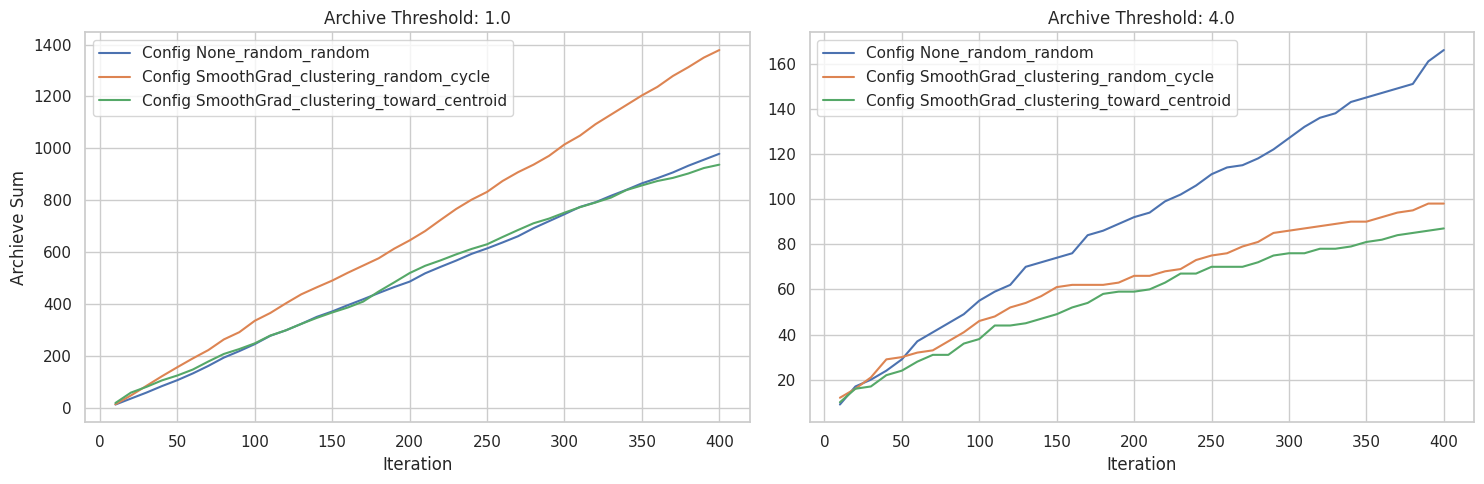

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Get unique archive_threshold values
archive_thresholds = df_summary["archive_threshold"].unique()
configs = df_summary["xmutant_config"].unique()  # Get unique config values

# Set up the plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, len(archive_thresholds), figsize=(15, 5), sharey=False)

# Loop through each archive_threshold and plot
for i, threshold in enumerate(archive_thresholds):
    ax = axes[i] if len(archive_thresholds) > 1 else axes  # Support single plot case
    df_subset = df_summary[df_summary["archive_threshold"] == threshold]

    # Plot for each config
    for config in configs:
        df_config = df_subset[df_subset["xmutant_config"] == config]
        ax.plot(df_config["iteration"], df_config["archieve_sum"], label=f"Config {config}")

    ax.set_title(f"Archive Threshold: {threshold}")
    ax.set_xlabel("Iteration")
    if i == 0:
        ax.set_ylabel("Archieve Sum")
    ax.legend()


# Show the plots
plt.tight_layout()
plt.show()


In [10]:
configs

array(['None_random_random', 'SmoothGrad_clustering_random_cycle'],
      dtype=object)

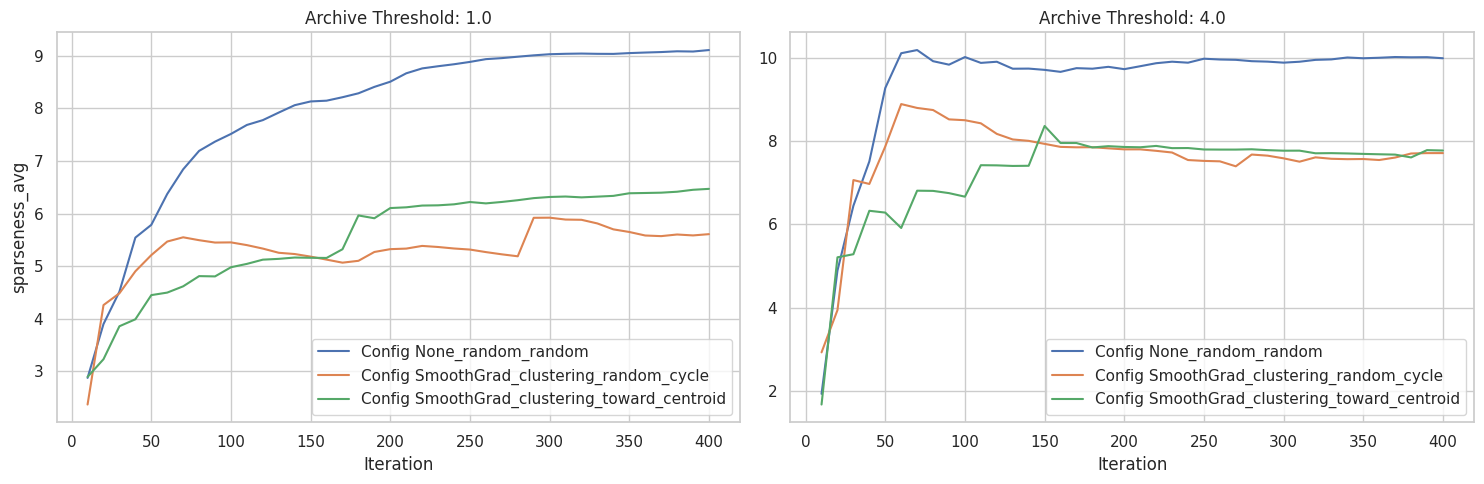

In [8]:
sns.set_style("whitegrid")

# Get unique archive_threshold values
archive_thresholds = df_summary["archive_threshold"].unique()
configs = df_summary["xmutant_config"].unique()  # Get unique config values

# Set up the plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, len(archive_thresholds), figsize=(15, 5), sharey=False)

# Loop through each archive_threshold and plot
for i, threshold in enumerate(archive_thresholds):
    ax = axes[i] if len(archive_thresholds) > 1 else axes  # Support single plot case
    df_subset = df_summary[df_summary["archive_threshold"] == threshold]

    # Plot for each config
    for config in configs:
        df_config = df_subset[df_subset["xmutant_config"] == config]
        ax.plot(df_config["iteration"], df_config["sparseness_avg"], label=f"Config {config}")

    ax.set_title(f"Archive Threshold: {threshold}")
    ax.set_xlabel("Iteration")
    if i == 0:
        ax.set_ylabel("sparseness_avg")
    ax.legend()

# Show the plots
plt.tight_layout()
plt.show()